## Loading data

In [1]:
import pandas as pd
train = pd.read_csv("data/train.csv")
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2]:
pd.isnull(train).sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [3]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## Helpers

In [4]:
from scipy.stats import skew 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

def remove_na(data):
    for col in data.columns:
        if data[col].isnull().sum() > 50:
            data = data.drop(col,1)
        else:
            if data[col].dtype == object:
                data.loc[data[col].isnull(), col] = "Un"
            else:
                data.loc[data[col].isnull(), col] = data[col].median()
    return data

def remove_skew(data):
    num_cols = data.columns[data.dtypes != object]
    for col in num_cols:
        if skew(data[col]) > 0.5:
            data.loc[data[col] == 0, col] = 10**-10
            data[col] = np.log(data[col])
    return data

def preprocess_labels(features):
    le = preprocessing.LabelEncoder()
    for i in range(0,features.shape[1]):
        features[:,i] = le.fit_transform(features[:,i])
    return features

def scale_features(features):
    scaler = preprocessing.StandardScaler().fit(features)
    features_scaled = scaler.transform(features)
    return features_scaled

def cross_validate(estimator, X, y, splits):
    summ = 0;
    k_fold = KFold(n_splits=splits)
    for train, test in k_fold.split(X):
        model = estimator.fit(X[train], y[train])
        test_sc = model.score(X[test], y[test])
        train_sc = model.score(X[train], y[train])
        print("Train: " + str(train_sc))
        print("Test: " + str(test_sc))

        summ +=test_sc
    avg = summ/splits 
    print("Average: " + str(avg))
    
def get_predictions(estimator, X_train, y_train, X_test, splits): 
    k_fold = KFold(n_splits=splits)

    result_train = np.zeros(( len(X_train[:, 0]),))
    result_test = np.zeros(( len(X_test[:, 0]),))
    test_folds = np.empty((splits, len(X_test[:, 0]) ))
    
    print("Len of test_folds " + str(len(test_folds[1])))
    print("Len of X_test " + str(len(X_test[:, 0])))
    print( "Len of result train " + str(len(result_train)))

    
    idx = 0
    for (train, test) in k_fold.split(X_train):
        x_train_fold = X_train[train]
        y_train_fold = y_train[train]
        x_test_fold = X_train[test]

        estimator.fit(x_train_fold, y_train_fold)
        result_train[test] = estimator.predict(x_test_fold)
        
        preds = estimator.predict(X_test)
        
        test_folds[idx, :] = preds
        idx += 1
        
    result_test[:] = test_folds.mean(axis=0)
    
    return result_train.reshape(-1,1), result_test.reshape(-1, 1)
        
def plot_predictions(y_pred, y_test):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, s=20)
    plt.title('Predicted prices vs. Actual prices')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.tight_layout()        
    
def preprocess_testset():
    test = pd.read_csv("data/test.csv")

    test = remove_na(test)
    test = remove_skew(test)

    features_test_kaggle = preprocess_labels(test.as_matrix())
    features_test_kaggle = scale_features(features_test_kaggle)
    
    return features_test_kaggle, test
    
def generate_submission(estimator):
    features_test_kaggle, test = preprocess_testset()
    
    y_test_kaggle = estimator.predict(features_test_kaggle)
    
    ids = test["Id"].astype(int)
    result = pd.DataFrame(data=np.exp(y_test_kaggle), columns = ["SalePrice"], index=ids)
    result.to_csv("data/result.csv")

## Preprocessing

In [5]:
train = remove_na(train)
train = remove_skew(train)

In [6]:
X_train = train.drop("SalePrice",1)
y_train = train["SalePrice"]

features_train = X_train.as_matrix()
target_train = y_train.as_matrix()

In [7]:
features_train = preprocess_labels(features_train)
features_train = scale_features(features_train)

/Users/ksenia/my-venv/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Random forests regression model

### Fitting and estimating model

In [8]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(random_state=3, n_estimators=600, max_depth=100, max_features=9, 
                                     min_samples_split=5)

cross_validate(model_forest, features_train, target_train, 10)

Train: 0.974225662903
Test: 0.885055011723
Train: 0.973147709043
Test: 0.902091705292
Train: 0.973089554109
Test: 0.898669055371
Train: 0.97438153215
Test: 0.845469308222
Train: 0.974168550905
Test: 0.868908629664
Train: 0.973979660172
Test: 0.892735064877
Train: 0.974265525645
Test: 0.874805780672
Train: 0.973787774478
Test: 0.901765460795
Train: 0.973807762551
Test: 0.861607355649
Train: 0.974669481888
Test: 0.876293918675
Average: 0.880740129094


### Predictions

In [9]:
from sklearn.model_selection import train_test_split

X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(features_train, target_train)

model_forest_p = RandomForestRegressor(random_state=3, n_estimators=600, max_depth=100, max_features=9, 
                                     min_samples_split=5)

model_forest_p.fit(X_train_mf, y_train_mf)

y_pred_mf = model_forest_p.predict(X_test_mf)

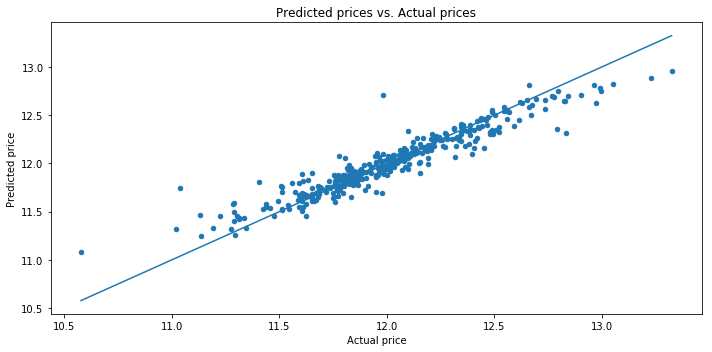

In [10]:
%matplotlib inline

plot_predictions(y_pred_mf, y_test_mf)

## Support Vector Machines 

### Fitting and estimating model

In [12]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', verbose=2)

cross_validate(svr_lin, features_train, target_train, 5)

[LibSVM]Train: 0.896666419354
Test: 0.909004810246
[LibSVM]Train: 0.903353265626
Test: 0.879092438806
[LibSVM]Train: 0.900265946708
Test: 0.895563855579
[LibSVM]Train: 0.898987254978
Test: 0.896679915279
[LibSVM]Train: 0.906313176726
Test: 0.859570892686
Average: 0.887982382519


### Predictions

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(features_train, target_train)

svr_lin_p = SVR(kernel='linear')

svr_lin_p.fit(X_train_sv, y_train_sv)

y_pred_sv = svr_lin_p.predict(X_test_sv)

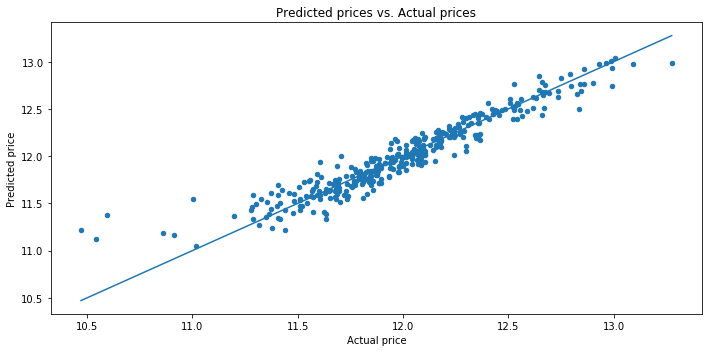

In [15]:
%matplotlib inline

plot_predictions(y_pred_sv, y_test_sv)

## Gradient Boosting Tree

### Fitting and estimating model

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(learning_rate=0.02, n_estimators=2000, max_depth=3, random_state=1,
                                     min_samples_split=6, max_features=0.1)

cross_validate(model_gb, features_train, target_train, 10)

Train: 0.980820624094
Test: 0.907854341563
Train: 0.980062855077
Test: 0.945942423814
Train: 0.979791850841
Test: 0.93959083838
Train: 0.981070802646
Test: 0.86276055631
Train: 0.982441165138
Test: 0.897742589386
Train: 0.980458775626
Test: 0.927032250685
Train: 0.980835511519
Test: 0.914452015663
Train: 0.980188576009
Test: 0.936906247258
Train: 0.980449882673
Test: 0.914964964581
Train: 0.981455008093
Test: 0.900479783933
Average: 0.914772601157


### Predictions

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(features_train, target_train)

model_gb_p = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5, random_state=1,
                                     min_samples_split=5, max_features=0.2)

model_gb_p.fit(X_train_gb, y_train_gb)

y_pred_gb = model_gb_p.predict(X_test_gb)

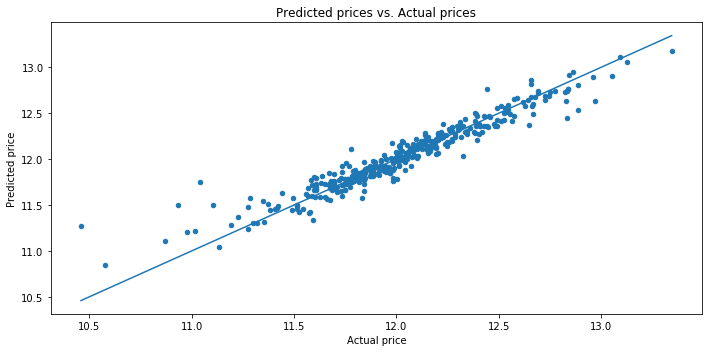

In [18]:
%matplotlib inline

plot_predictions(y_pred_gb, y_test_gb)

In [19]:
generate_submission(model_gb)

## Models stacking with XGBoost

### Getting first level models predictions

In [21]:

features_test, test = preprocess_testset()

forest_train, forest_test = get_predictions(model_forest, features_train, target_train, features_test, 10)
svr_lin_train, svr_lin_test = get_predictions(svr_lin, features_train, target_train, features_test, 10)
gb_train, gb_test = get_predictions(model_gb, features_train, target_train, features_test, 10)
#ada_train, ada_test = get_predictions(AdaBoostRegressor(n_estimators=1000), features_train, target_train, features_test, 10)
#ext_train, ext_test = get_predictions(ExtraTreesRegressor(n_estimators=1000), features_train, target_train, features_test, 10)

Len of test_folds 1459
Len of X_test 1459
Len of result train 1460
Len of test_folds 1459
Len of X_test 1459
Len of result train 1460
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Len of test_folds 1459
Len of X_test 1459
Len of result train 1460


In [22]:
len(features_test[:,0])

1459

### Combining datasets

In [23]:
SX_train = np.concatenate((forest_train, svr_lin_train, gb_train), axis=1)
SX_test = np.concatenate((forest_test, svr_lin_test, gb_test), axis=1)

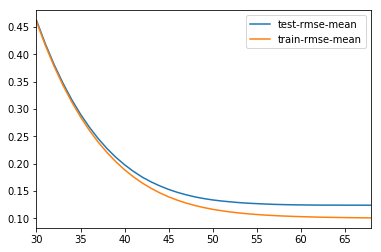

In [24]:
import xgboost as xgb

dtrain = xgb.DMatrix(SX_train, label = target_train)
dtest = xgb.DMatrix(SX_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [32]:
model_xgb = xgb.XGBRegressor(n_estimators=3000, max_depth=5, learning_rate=0.1, random_state=1, 
                             reg_alpha=1, subsample=1)

cross_validate(model_xgb, SX_train, target_train, 10)


Train: 0.943516504286
Test: 0.897839582002
Train: 0.939125929068
Test: 0.941449683111
Train: 0.940521899031
Test: 0.933180622136
Train: 0.9419690332
Test: 0.870400811339
Train: 0.944852044874
Test: 0.825615866832
Train: 0.941786335377
Test: 0.919922547616
Train: 0.942203044445
Test: 0.909332490144
Train: 0.940478749831
Test: 0.932379010979
Train: 0.942670536045
Test: 0.893942872504
Train: 0.942589224675
Test: 0.908164192543
Average: 0.903222767921


In [33]:
y_test_kaggle = model_xgb.predict(SX_test)
test = pd.read_csv("data/test.csv")

ids = test["Id"].astype(int)
result = pd.DataFrame(data=np.exp(y_test_kaggle), columns = ["SalePrice"], index=ids)
result.to_csv("data/result.csv")

### Neural network

In [103]:
from sklearn.neural_network import MLPRegressor 

model_nn = MLPRegressor(hidden_layer_sizes=(30,50,20,), random_state=2, alpha=0.00001, max_iter=100000)

cross_validate(model_nn, SX_train, target_train, 10)

Train: 0.457464421844
Test: 0.384202913023
Train: 0.455080765923
Test: 0.534391721573
Train: 0.453651082219
Test: 0.541008438191
Train: 0.456406014966
Test: 0.462466652614
Train: 0.447327372711
Test: 0.523487000104
Train: 0.552652419967
Test: 0.578743584343
Train: 0.413839103084
Test: 0.317380731931
Train: 0.405672072761
Test: 0.335082383011
Train: 0.481162321718
Test: 0.455537965683
Train: 0.397048114205
Test: 0.301307409687
Average: 0.443360880016


In [21]:
from sklearn.model_selection import train_test_split

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(features_train, target_train)

model_nn_p = MLPRegressor(hidden_layer_sizes=(30,50,30,), random_state=2, alpha=2.5)

model_nn_p.fit(X_train_nn, y_train_nn)

y_pred_nn = model_nn_p.predict(X_test_nn)

/Users/ksenia/my-venv/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


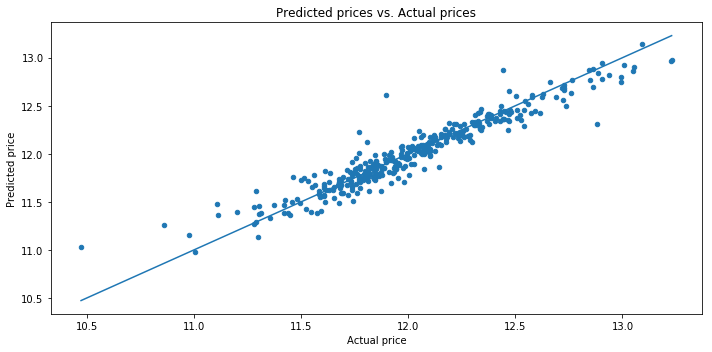

In [230]:
%matplotlib inline

plot_predictions(y_pred_gb, y_test_gb)

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb_c = GradientBoostingRegressor(learning_rate=0.002, n_estimators=3000, max_depth=3, random_state=4,
                                     min_samples_split=5, max_features=2)

cross_validate(model_gb_c, SX_train, target_train, 10)

Train: 0.94080490998
Test: 0.901058650121
Train: 0.937400227753
Test: 0.936281728313
Train: 0.937574764609
Test: 0.939445267706
Train: 0.941686803328
Test: 0.839685914973
Train: 0.942835950442
Test: 0.836249383469
Train: 0.938957635668
Test: 0.911318507213
Train: 0.938611369782
Test: 0.908254651327
Train: 0.938056221739
Test: 0.932605229
Train: 0.939637564228
Test: 0.857954998007
Train: 0.94007866119
Test: 0.900537514805
Average: 0.896339184493


In [101]:
y_test_kaggle = model_gb_c.predict(SX_test)
test = pd.read_csv("data/test.csv")

ids = test["Id"].astype(int)
result = pd.DataFrame(data=np.exp(y_test_kaggle), columns = ["SalePrice"], index=ids)
result.to_csv("data/result.csv")

## Linear regression

### Fit and extimate model

In [108]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()

rfe = RFE(estimator=model_lin, n_features_to_select=20, step=1)

cross_validate(rfe, features_train, target_train, 10)

Train: 0.89027192419
Test: 0.866673423593
Train: 0.885318418777
Test: 0.908906150351
Train: 0.885030831295
Test: 0.916383602947
Train: 0.894096553861
Test: 0.840990861301
Train: 0.892208545475
Test: 0.870552543723
Train: 0.88912187578
Test: 0.88633375676
Train: 0.891673899466
Test: 0.874549450271
Train: 0.888335778191
Test: 0.900383593453
Train: 0.893600361523
Test: 0.829343077256
Train: 0.886610975039
Test: 0.891550160196
Average: 0.878566661985
